# Task 3: Car Prediction with Machine Learning 
## Using Python Multiple Linear Regression Model

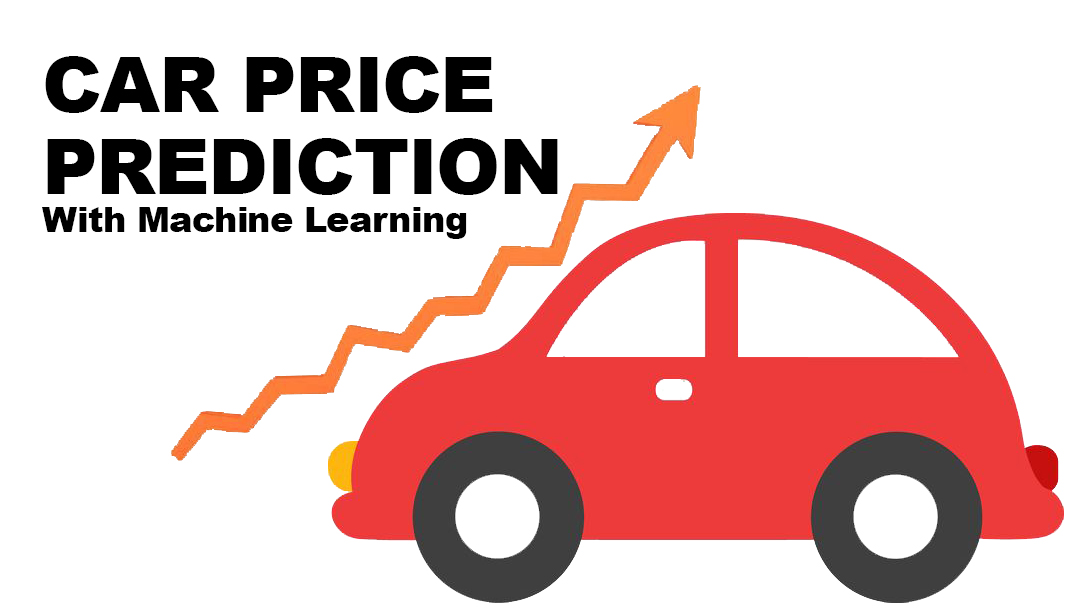

## Problem Statement
    - The price of a car depends on a lot of factors like: 
      the goodwill of the car, features of the car, horsepower and the mileage it gives  and many more.
    - The task is to use machine learning to train a car price prediction model

In [1]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data
df = pd.read_csv(r'C:\Users\user\Desktop\GD\tutorials\Data Science\Oasis\car sales prediction data\car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#making a copy of the dataset
df_copy = df.copy()

In [5]:
# checking the shape of the data
df_copy.shape

(301, 9)

In [6]:
# checking for the data info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking for missing value
df_copy.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Checking for the unique values for the columns (Owner, Transmission, Selling_type, Fuel_type)

In [8]:
df_copy['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [9]:
df_copy['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df_copy['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
df_copy['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

### Checking the value counts for (fuel_type, Transmission_type, and seller_type)

In [12]:
#value count for the Fuel_type
df_copy['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [13]:
#value count for the Transmission
df_copy['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [14]:
#value count for the selling_type
df_copy['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [35]:
195+106

301

In [15]:
#value count for the Year
df_copy['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

### Changing the names to numerical values using the mapping method

In [16]:
#mapping the 'Fuel_type' column 
df_copy.Fuel_Type = df_copy.Fuel_Type.map({'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2})

#mapping the 'Transmission' column
df_copy.Transmission = df_copy.Transmission.map({'Manual' : 0, 'Automatic' : 1})

#mapping the 'Selling_type' column
df_copy.Selling_type = df_copy.Selling_type.map({'Dealer' : 0, 'Individual' : 1})

df_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Spliting the data into 'X-Independent variable' and 'y-target variable' 

In [17]:
X = df_copy.drop(columns = ['Car_Name', 'Selling_Price'])
y = df_copy['Selling_Price']

In [18]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### splitting the 'X' and 'y' variables into training and testing data set using train_test_split method

In [20]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

### Introducing Mulitple Linear Regression for our model traing

In [22]:
# importing linaer regression
from sklearn.linear_model import LinearRegression

In [23]:
mlr = LinearRegression()

In [24]:
#fitting our model
mlr.fit(X_train, y_train)

LinearRegression()

In [25]:
#creating a variable for our test data prediction
y_pred_test = mlr.predict(X_test)

#creating a variable for our training data prediction
y_pred_train = mlr.predict(X_train)

### Intoducing the "Mean_Absolute_Error" , "Mean_Squared_Error" & "r2_score" to further check the accuracy of the model

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
#model accuracy for the test data
print('Model Accuracy:', r2_score(y_test, y_pred_test) * 100)

Model Accuracy: 85.46653254721095


In [28]:
#model accuracy for the training data 
print('Model Accuracy:', r2_score(y_train, y_pred_train) * 100)

Model Accuracy: 88.41571553345032


In [29]:
#checking for the Mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

1.1617679047566247

In [30]:
#checking for the Mean_squared_error
mean_squared_error(y_test, y_pred_test)

4.470863265744047

In [31]:
# checking the coefficeint
mlr.coef_

array([ 3.85922826e-01,  4.23249312e-01, -1.06506036e-05,  1.27648016e+00,
       -1.46086668e+00,  1.11923875e+00, -6.52564961e-01])

In [32]:
# checking the intercept
mlr.intercept_

-775.2627986194304

### visualizing the actual and predicted prices for the training data

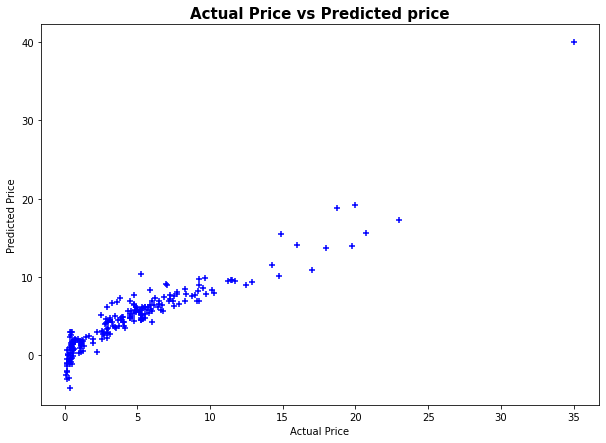

In [33]:
# visualizing using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.scatter(y_train, y_pred_train, color = 'blue', marker = '+')
plt.title('Actual Price vs Predicted price', fontweight = 'bold', fontsize = 15)
plt.show()

### visualizing actual and predicted prices for the test data

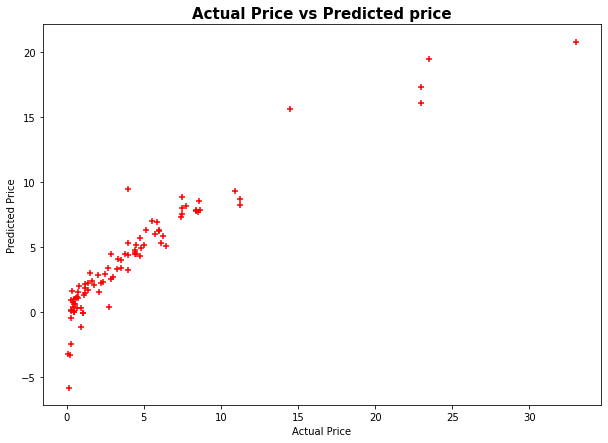

In [34]:
# visualizing using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.scatter(y_test, y_pred_test, color = 'red', marker = '+')
plt.title('Actual Price vs Predicted price', fontweight = 'bold', fontsize = 15)
plt.show()